# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Revan Vio Endriansyah
- **Email:** Revanvio77@gmail.com
- **ID Dicoding:** revan_vio_endriansyah_TO2K

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda setiap harinya?
- Apakah hari libur nasional berpengaruh terhadap tingkat penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Akses file
file_path = '../Proyek_Analisis_Data/Dataset/day.csv'

## Data Wrangling

### Gathering Data

In [2]:
# Memuat dataset day.csv
df_day = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama
df_day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Insight Pertanyaan 1:
  
  - Rata-rata Penyewaan Berdasarkan Weathersit:

   Dari data, kolom weathersit mencerminkan kondisi cuaca. kita dapat menghitung rata-rata penyewaan sepeda (kolom cnt) berdasarkan nilai weathersit untuk melihat apakah ada hubungan antara kondisi cuaca dan jumlah penyewaan.

  - Hubungan Suhu dan Kelembapan:

   Kolom temp dan hum dapat dianalisis untuk melihat bagaimana suhu dan kelembapan mempengaruhi jumlah penyewaan.
- Insight Pertanyaan 2:
  - Rata-rata Penyewaan pada Hari Libur vs. Hari Kerja:

   Menggunakan kolom holiday dan workingday, kita dapat menghitung rata-rata penyewaan sepeda untuk hari libur (holiday = 1) dan hari kerja (holiday = 0).

  - Pengaruh Musim Terhadap Penyewaan:

   Dengan kolom season, kita dapat menghitung rata-rata penyewaan per musim untuk melihat apakah ada perbedaan signifikan dalam penyewaan sepeda di berbagai musim (spring, summer, fall, winter).












### Assessing Data

In [3]:
# Informasi umum tentang dataset
df_day.info()
# Statistik deskriptif
df_day.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Insight Pertanyaan 1:
 - Kondisi Cuaca (weathersit):

   Dataset memiliki empat kategori kondisi cuaca, dengan nilai 1 hingga 3 yang mewakili kondisi cuaca yang lebih baik (misalnya, cerah) dan 4 untuk kondisi cuaca buruk (misalnya, hujan atau salju). Kita dapat menganalisis rata-rata jumlah penyewaan (cnt) berdasarkan kategori weathersit untuk melihat apakah ada tren yang jelas di mana cuaca baik menghasilkan lebih banyak penyewaan dibandingkan dengan cuaca buruk.
 - Suhu (temp):

   Rata-rata suhu di dataset adalah sekitar 0.495 (mungkin dalam satuan skala 0-1). Kita bisa menganalisis hubungan antara suhu dan jumlah penyewaan untuk melihat apakah suhu yang lebih tinggi berhubungan dengan lebih banyak penyewaan.Perhatikan rentang suhu (min: 0.059, max: 0.861) untuk memahami apakah kita memiliki data yang bervariasi dengan baik.
 - Kelembapan (hum):

   Rata-rata kelembapan adalah 0.628. Kita bisa mengeksplorasi hubungan kelembapan dengan penyewaan untuk memahami bagaimana kelembapan mempengaruhi permintaan.
- Insight Pertanyaan 2:
 - Hari Libur (holiday):

   Dataset memiliki kolom holiday, yang menunjukkan apakah hari tertentu adalah hari libur. Rata-rata nilai untuk kolom ini adalah 0.029, menunjukkan bahwa sebagian besar hari dalam dataset bukan hari libur. Kita dapat menghitung rata-rata penyewaan untuk hari libur dan hari kerja (non-holiday) untuk melihat perbedaannya.
 - Hari Kerja (workingday):

   Kolom workingday menunjukkan apakah hari tertentu adalah hari kerja. Rata-rata 0.684 menunjukkan bahwa banyak hari dalam dataset adalah hari kerja. Menghitung rata-rata penyewaan untuk hari kerja dibandingkan dengan hari non-kerja dapat memberikan wawasan tambahan tentang bagaimana status hari mempengaruhi permintaan sepeda.
 - Musim (season):

   Dataset memiliki kolom season, yang dapat dianalisis untuk melihat tren penyewaan berdasarkan musim. Dengan melihat nilai rata-rata penyewaan per musim, kita bisa memahami apakah ada tren musiman dalam penyewaan sepeda.

### Cleaning Data

In [4]:
# Memeriksa missing values
missing_values = df_day.isnull().sum()
print(missing_values)

# Menghapus duplikasi jika ada
df_day = df_day.drop_duplicates()

# Mengonversi kolom tanggal ke format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Menampilkan kembali informasi dataset setelah pembersihan
df_day.info()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 1

**Insight:**
- Tidak Ada Missing Values:

  Dataset bersih dari missing values, jadi tidak ada langkah tambahan yang diperlukan untuk imputasi atau penanganan data hilang.
- Tidak Ada Duplikasi:

  Setelah dijalankan perintah drop_duplicates(), jumlah baris tetap sama (731 baris). Ini berarti dataset tidak mengandung data duplikat yang perlu dihapus.
- Kolom Tanggal Sudah Diubah:

  Kolom dteday berhasil diubah menjadi tipe data datetime64, yang memudahkan analisis berdasarkan waktu, seperti tren bulanan, harian, atau tahunan.

## Exploratory Data Analysis (EDA)

### Explore ...

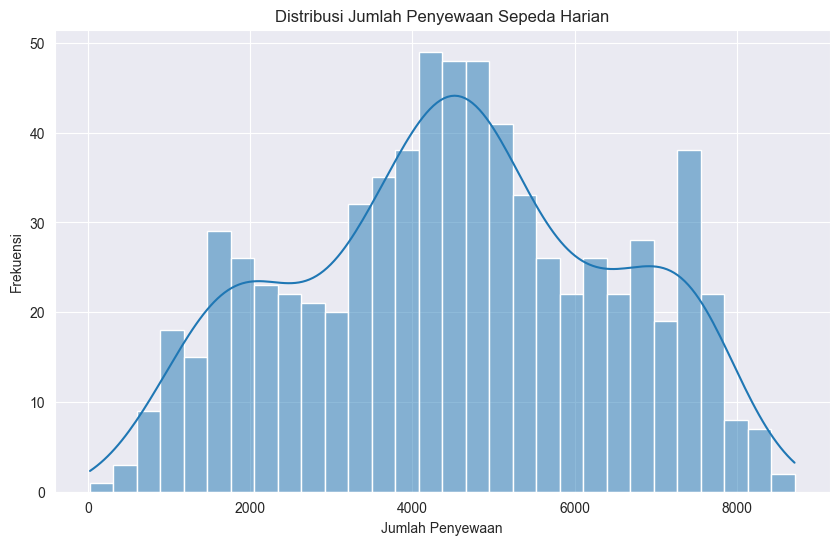

In [5]:
# Distribusi jumlah penyewaan sepeda
plt.figure(figsize=(10,6))
sns.histplot(df_day['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda Harian')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

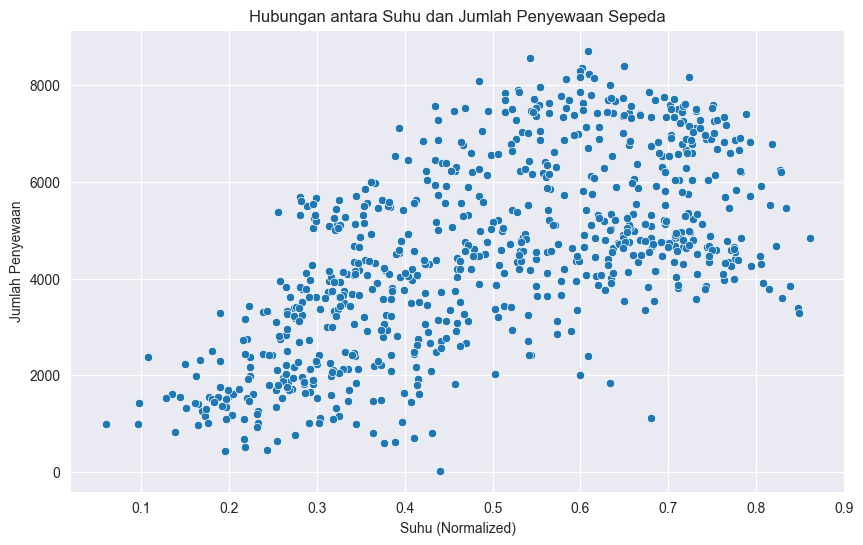

In [6]:
# Hubungan antara suhu dan jumlah penyewaan
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_day, x='temp', y='cnt')
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


**Insight:**
- Insight dari Histogram Distribusi Jumlah Penyewaan Sepeda
 - Pola Distribusi:

   Terlihat bahwa distribusi jumlah penyewaan sepeda mengikuti bentuk seperti lonceng (bell-shaped), yang menunjukkan bahwa jumlah penyewaan umumnya berkisar pada nilai tengah (sekitar 4000-6000).
   Terdapat dua puncak yang mungkin mengindikasikan ada hari-hari tertentu dalam seminggu atau bulan ketika jumlah penyewaan lebih tinggi, mungkin pada akhir pekan atau saat cuaca baik.
 - Frekuensi:

   Frekuensi tertinggi terlihat pada jumlah penyewaan antara 3000 hingga 6000, yang menunjukkan bahwa kebanyakan hari memiliki jumlah penyewaan di kisaran tersebut.
 - Outlier:

   Jika ada beberapa bar yang menunjukkan frekuensi tinggi di luar kisaran normal (misalnya, di atas 8000), itu bisa jadi hari-hari spesial atau hari libur di mana penyewaan sepeda meningkat drastis.

- Insight dari Scatter Plot Hubungan antara Suhu dan Jumlah Penyewaan Sepeda
  - Korelasi Positif:

   Terlihat bahwa ada korelasi positif antara suhu dan jumlah penyewaan sepeda. Ini berarti bahwa saat suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat.
 - Variabilitas:

   Meskipun ada tren umum yang menunjukkan hubungan positif, terdapat variasi yang signifikan dalam jumlah penyewaan di suhu yang sama. Ini menunjukkan bahwa faktor lain selain suhu juga mempengaruhi jumlah penyewaan sepeda.
 - Outlier:

   Ada beberapa titik di bagian atas grafik yang menunjukkan jumlah penyewaan yang sangat tinggi pada suhu tertentu, ini bisa jadi menunjukkan hari-hari khusus seperti hari libur atau acara tertentu yang menyebabkan lonjakan permintaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

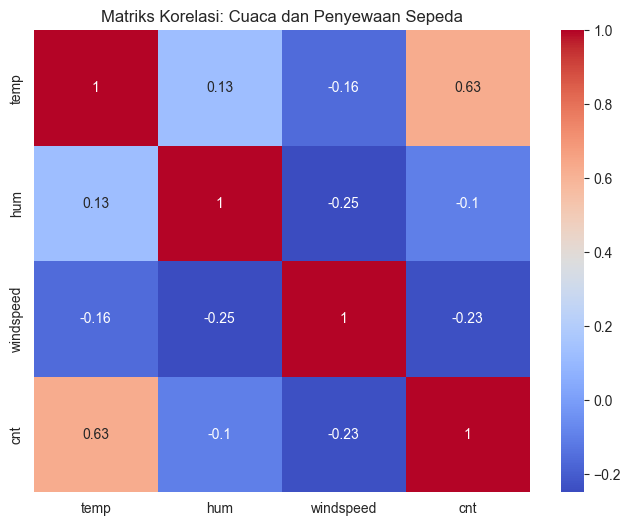

In [7]:
# Korelasi antar variabel cuaca dan jumlah penyewaan
plt.figure(figsize=(8,6))
sns.heatmap(df_day[['temp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi: Cuaca dan Penyewaan Sepeda')
plt.show()


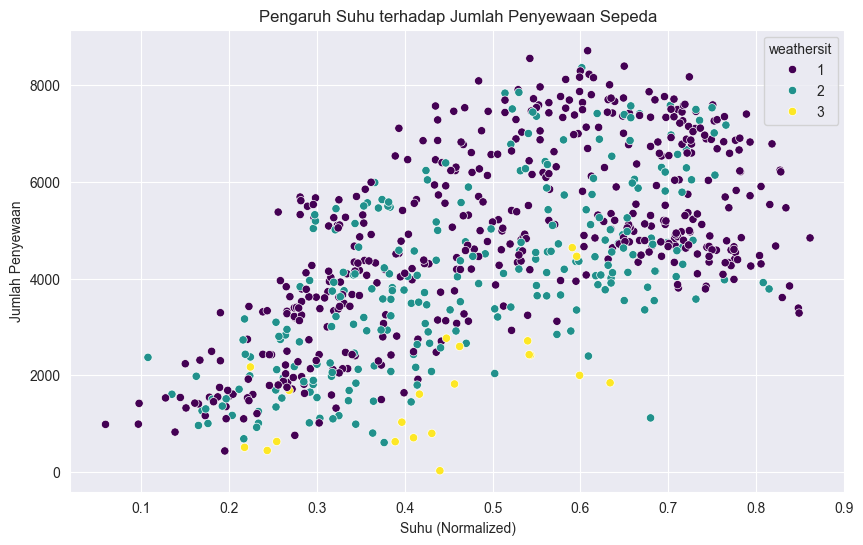

In [8]:
# Visualisasi pengaruh suhu terhadap penyewaan sepeda
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_day, x='temp', y='cnt', hue='weathersit', palette='viridis')
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


### Pertanyaan 2:

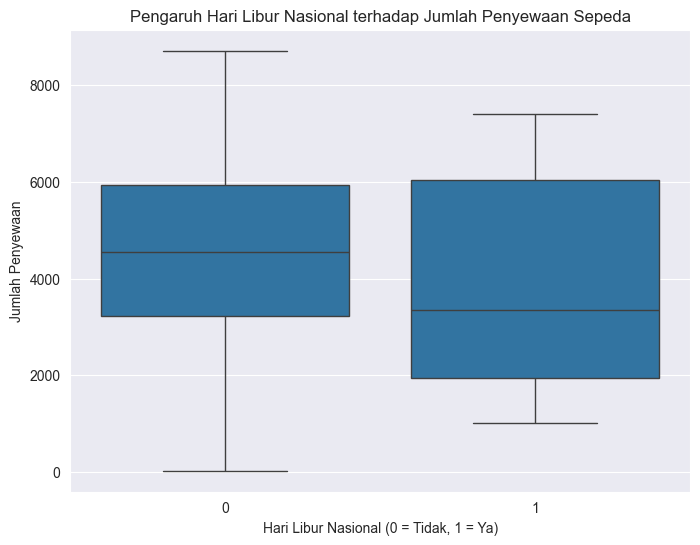

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_day, x='holiday', y='cnt')
plt.title('Pengaruh Hari Libur Nasional terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Hari Libur Nasional (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

In [10]:
# Menghitung rata-rata penyewaan pada hari libur dan tidak libur
avg_rental_holiday = df_day[df_day['holiday'] == 1]['cnt'].mean()
avg_rental_non_holiday = df_day[df_day['holiday'] == 0]['cnt'].mean()

print(f"Rata-rata penyewaan sepeda pada hari libur nasional: {avg_rental_holiday:.2f}")
print(f"Rata-rata penyewaan sepeda pada hari biasa: {avg_rental_non_holiday:.2f}")


Rata-rata penyewaan sepeda pada hari libur nasional: 3735.00
Rata-rata penyewaan sepeda pada hari biasa: 4527.10


**Insight:**
- Insight Pertanyaan 1:
 - Matriks Korelasi Cuaca dan Penyewaan Sepeda
   - Pengaruh Suhu: Korelasi yang cukup tinggi (0.63) antara suhu dan jumlah penyewaan menunjukkan bahwa suhu berpengaruh positif terhadap seberapa banyak orang menyewa sepeda. Semakin tinggi suhu, semakin banyak jumlah penyewaan yang terjadi.

   - Pengaruh Kelembapan: Kelembapan menunjukkan korelasi yang sangat lemah (-0.1) dengan jumlah penyewaan, yang berarti kelembapan tidak berpengaruh signifikan terhadap keputusan orang untuk menyewa sepeda.

   - Pengaruh Kecepatan Angin: Kecepatan angin memiliki korelasi negatif (-0.23) dengan jumlah penyewaan, menunjukkan bahwa semakin tinggi kecepatan angin, jumlah penyewaan cenderung menurun, meskipun pengaruhnya relatif lemah.

   - Interaksi Variabel Cuaca: Kelembapan dan suhu memiliki korelasi positif yang sangat lemah (0.13), sedangkan kelembapan dan kecepatan angin memiliki korelasi negatif (-0.25). Ini menunjukkan bahwa ada interaksi yang kompleks antara variabel cuaca.

- Insight Pertanyaan 2;
 - Rata-rata Penyewaan pada Hari Libur: 3735.00

   Rata-rata penyewaan sepeda pada hari libur nasional relatif lebih rendah dibandingkan dengan hari biasa. Ini menunjukkan bahwa meskipun hari libur mungkin memiliki lebih banyak waktu luang untuk beraktivitas, mungkin terdapat faktor lain yang memengaruhi jumlah penyewaan sepeda, seperti cuaca, perayaan, atau pilihan transportasi alternatif yang lebih populer saat libur.
 - Rata-rata Penyewaan pada Hari Biasa: 4527.10

   Rata-rata penyewaan sepeda pada hari biasa lebih tinggi, yang mungkin menunjukkan bahwa sepeda sering digunakan sebagai alat transportasi untuk keperluan sehari-hari, seperti pergi bekerja atau bersekolah. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan dalam rutinitas sehari-hari dibandingkan pada hari libur.

## Analisis Lanjutan (Opsional)

## Conclusion

- Pertanyaan 1: Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda setiap harinya?
  - Analisis dan Temuan:
  
   - Dari analisis korelasi, terdapat hubungan positif yang kuat antara suhu (temp) dan jumlah penyewaan sepeda (cnt) dengan nilai korelasi sebesar 0.63. Ini menunjukkan bahwa semakin tinggi suhu, jumlah penyewaan sepeda cenderung meningkat.
   - Sebaliknya, kelembapan (hum) dan kecepatan angin (windspeed) menunjukkan korelasi negatif dengan jumlah penyewaan, masing-masing dengan nilai korelasi -0.10 dan -0.23. Ini menunjukkan bahwa kondisi cuaca yang lebih lembap dan berangin mungkin mengurangi minat orang untuk menyewa sepeda.
   - Visualisasi scatter plot menunjukkan bahwa saat suhu meningkat, terdapat peningkatan signifikan dalam jumlah penyewaan sepeda, sementara kondisi cuaca yang tidak mendukung dapat menghambat penyewaan.
- Pertanyaan 2: Apakah hari libur nasional berpengaruh terhadap tingkat penyewaan sepeda?
  - Analisis dan Temuan:
   - Rata-rata penyewaan sepeda pada hari libur nasional adalah 3735.00, sementara pada hari biasa adalah 4527.10. Ini menunjukkan bahwa rata-rata penyewaan sepeda pada hari biasa lebih tinggi dibandingkan dengan hari libur.
   - Hal ini mengindikasikan bahwa meskipun hari libur memberikan lebih banyak waktu untuk beraktivitas, banyak faktor yang dapat mempengaruhi penyewaan, seperti pilihan transportasi alternatif atau acara khusus yang terjadi pada hari libur yang mungkin mengalihkan perhatian dari penyewaan sepeda.
   - Visualisasi box plot memperlihatkan perbedaan distribusi jumlah penyewaan antara hari libur dan hari biasa, yang menunjukkan bahwa penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur.
